# How-To Notebook

This notebook shows how to use the repository.

### Initialize parameters

The line of code below contains all of the relevant parameters:

In [5]:
earlyStop = 20
batch_size = 8
epochs = 1
hierarchyLevel = 0

### How to open dataset

Datasets are opened with the corresponding class. The class has all the necessary preprocessing steps built-in. The main output of the data class are the dataloaders. These can be passed to the BSC model later for training, validation and testing. Below the difference between the pandas dataframes shows the data preprocessing in action.

In [6]:
from BlurbDataset.BlurbDataset import BlurbDataset
data = BlurbDataset(earlyStop=earlyStop, batch_size=batch_size)
display(data.trainDF.head())
data.prepareData()
data.trainDF.head()

,title,body,author,published,topics
0,The New York Times Daily Crossword Puzzles: Th...,Monday’s Crosswords Do with EaseTuesday’s Cros...,New York Times,"Dec 28, 1996","[Nonfiction, Games]"
1,Creatures of the Night (Second Edition),Two of literary comics modern masters present ...,Neil Gaiman,"Nov 29, 2016","[Fiction, Graphic Novels & Manga]"
2,Cornelia and the Audacious Escapades of the So...,Eleven-year-old Cornelia is the daughter of tw...,Lesley M. M. Blume,"Jan 08, 2008","[Children’s Books, Children’s Middle Grade Books]"
3,The Alchemist's Daughter,"During the English Age of Reason, a woman cloi...",Katharine McMahon,"Oct 24, 2006","[Fiction, Historical Fiction]"
4,Dangerous Boy,A modern-day retelling of The Strange Case of ...,Mandy Hubbard,"Aug 30, 2012","[Teen & Young Adult, Teen & Young Adult Myster..."


Tokenization:   0%|          | 0/20 [00:00<?, ?it/s]c:\Users\luc.stebens\Anaconda3\envs\BERTTextClassification\lib\site-packages\transformers\tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Tokenization:   0%|          | 0/10 [00:00<?, ?it/s]c:\Users\luc.stebens\Anaconda3\envs\BERTTextClassification\lib\site-packages\transformers\tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='m

,title,body,author,published,topics,labels,tokenizedTopics,attentionMask
0,The New York Times Daily Crossword Puzzles: Th...,Monday’s Crosswords Do with EaseTuesday’s Cros...,New York Times,"Dec 28, 1996","[Nonfiction, Games]","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[101, 6928, 1521, 1055, 2892, 22104, 2079, 200...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,Creatures of the Night (Second Edition),Two of literary comics modern masters present ...,Neil Gaiman,"Nov 29, 2016","[Fiction, Graphic Novels & Manga]","[2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[101, 2048, 1997, 4706, 5888, 2715, 5972, 2556...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,Cornelia and the Audacious Escapades of the So...,Eleven-year-old Cornelia is the daughter of tw...,Lesley M. M. Blume,"Jan 08, 2008","[Children’s Books, Children’s Middle Grade Books]","[3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[101, 5408, 1011, 2095, 1011, 2214, 9781, 1390...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
3,The Alchemist's Daughter,"During the English Age of Reason, a woman cloi...",Katharine McMahon,"Oct 24, 2006","[Fiction, Historical Fiction]","[2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[101, 2076, 1996, 2394, 2287, 1997, 3114, 1010...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,Dangerous Boy,A modern-day retelling of The Strange Case of ...,Mandy Hubbard,"Aug 30, 2012","[Teen & Young Adult, Teen & Young Adult Myster...","[4, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0]","[101, 1037, 2715, 1011, 2154, 2128, 23567, 207...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."


Save the perprocessed dataset

In [3]:
data.saveData()

Load preprocessed dataset

In [4]:
data = BlurbDataset(earlyStop=earlyStop, batch_size=batch_size,
                          tokenizedDataPath="BlurbDataset")

During training and inference the datapoints are masked such that at the chosen hierarchyLevel the datapoints that have label 0 - meaning no label at this hierarchy level - are being excluded. The following line of code shows this in action. 

In [18]:
hierarchyLevel = 2
for batch in data.dataloaders["train"]:
    b_labels = batch[2][:,hierarchyLevel]
    print(f"contant {b_labels} and shape of b_labels: {b_labels.shape}")
    b_input_ids = batch[0][b_labels!=0,:]
    print(f"contant {b_input_ids} and shape of b_input_ids: {b_input_ids.shape}")
    b_labels = b_labels[b_labels!=0]
    print(f"contant {b_labels} and shape of b_labels: {b_labels.shape}")
    break

contant tensor([6, 8, 2, 0, 0, 3, 5, 2], dtype=torch.int32) and shape of b_labels: torch.Size([8])
contant tensor([[  101,  1037,  3748,  ...,     0,     0,     0],
        [  101,  3251,  2009,  ...,     0,     0,     0],
        [  101,  1996,  2959,  ...,     0,     0,     0],
        [  101,  2023,  8001,  ...,     0,     0,     0],
        [  101,  2984, 28352,  ...,     0,     0,     0],
        [  101,  1996,  2146,  ...,     0,     0,     0]]) and shape of b_input_ids: torch.Size([6, 512])
contant tensor([6, 8, 2, 3, 5, 2], dtype=torch.int32) and shape of b_labels: torch.Size([6])


### How to load the BERT model

The BERT model is contained within a custom class called BSC - bert for sentence classification. Code show how to initialize the model:

In [7]:
from HierarchicalBERT.BERTSentenceClassification import BSC

model = BSC(
            dataloaders = data.dataloaders,
            epochs=epochs,
            listLabelDict = data.listLabelDict,
            num_labels=data.num_labels,
            hierarchyLevel=hierarchyLevel
        )

No GPU available, using the CPU instead.


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

Train the model:

In [8]:
model.train()


======== Epoch 1 / 1 ========
Training...


Training on batch:   0%|          | 0/2 [00:00<?, ?it/s]c:\Code\BertSentenceClassification\HierarchicalBERT\BERTSentenceClassification.py:191: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  
c:\Code\BertSentenceClassification\HierarchicalBERT\BERTSentenceClassification.py:203: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return_dict=True)
Training on batch: 3it [01:04, 21.53s/it]                       
c:\Code\BertSentenceClassification\HierarchicalBERT\BERTSentenceClassification.py:261: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  



  Average training loss: 4.22

Running Validation...
  Accuracy: 0.00
  Validation Loss: 4.16

Training complete!


and evaluate the training and validation loss over the epochs:

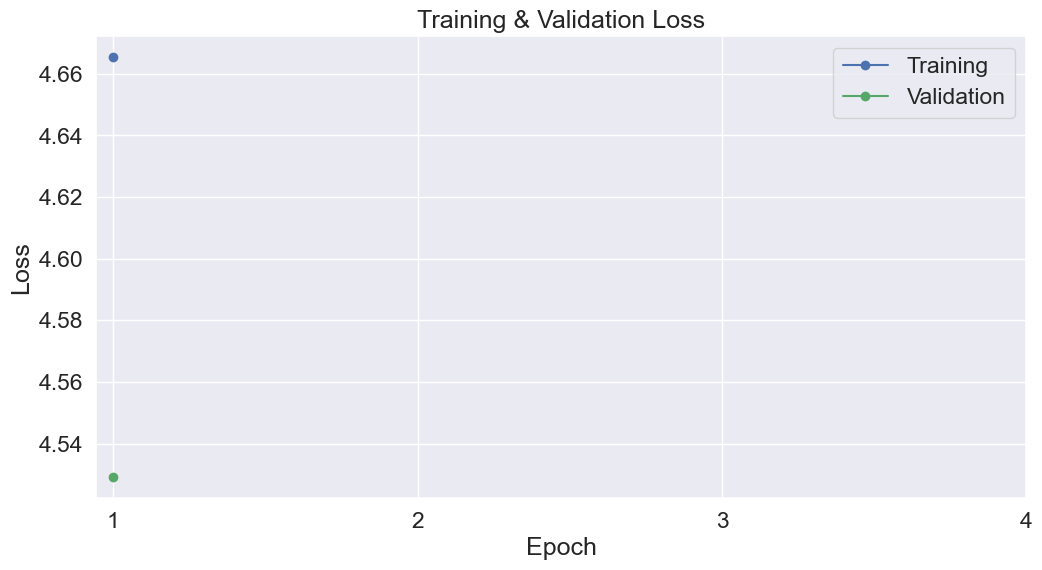

In [8]:
model.plotTrainingLoss()

### Model Testing

In [9]:
predictions = model.test()

Testing on batch:   0%|          | 0/2 [00:00<?, ?it/s]c:\Code\BertSentenceClassification\HierarchicalBERT\BERTSentenceClassification.py:118: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b_labels = torch.tensor(b_labels[b_labels!=0],dtype=torch.long).to(self.device)
Testing on batch:  50%|█████     | 1/2 [00:04<00:04,  4.87s/it]

Step: 0/2
True labels: [17  5  3 39]
Predictions: [41 41 78 41]


Testing on batch: 100%|██████████| 2/2 [00:06<00:00,  3.04s/it]

Testing done.


Show a couple of predicitons

### Inference

In [5]:
import pandas as pd
import numpy as np

body = np.array(["This wordless collection of strips by renowned artist/designer Rian Hughes reveals the lighter side of our obsession with social rankings.When everyone has a number, everyone knows their place. Lower numbers are better, higher numbers are less important, and that’s just the way it is. But what if that number could change? You might try to buck the system and assert your individuality… or you might end up with a big fat zero.Big questions are explored and unexpected answers found in the first solo comics collection from award-winning designer &amp; illustrator Rian Hughes. His whimsical, witty, and insightful strips will make you both smile and consider. Where do you stand in the pecking order? Is your number up? 2018 Pubwest Design Awards – Gold Winner for Graphic Album, New Material",
    "There’s hot, and then there’s Delilah Devlin. She’s in a class  by herself.",
    "A little girl proudly shows off her reading skills as she spends a day out on the town with her mom. Children are sure to be delighted as they read along with the narrator in ths fun, rhyming, easy-to-read story.",
    "The Screech Owls have come to Salt Lake City for the Peewee Winter Games – with the championship game to be played on the same ice surface where the Canadian men and women won Olympic hockey gold! Nish has plans to run his own competition: the Gross-Out Olympics, featuring everything from taping players to dressing room walls with duct tape to the “Snot Shot” – seeing how far they can fire a jellybean using only their noses. He also has a team contest to see who can figure out the Great Nish Secret and guess what the nuttiest Screech Owl of all has buried at centre ice for good luck. But that secret pales once the Owls find out something strange – something terrifying – is going on in the tunnels deep beneath the magnificent hills surrounding the Olympic site.",
    "Illus. in full color. Wild and domestic animals that preschoolers will want to see.From the Trade Paperback edition.",            
])
datapoints = pd.DataFrame()
datapoints["body"] = body

In [6]:
datapoints

,body
0,This wordless collection of strips by renowned...
1,"There’s hot, and then there’s Delilah Devlin. ..."
2,A little girl proudly shows off her reading sk...
3,The Screech Owls have come to Salt Lake City f...
4,Illus. in full color. Wild and domestic animal...


In [7]:
predictions = model.inference(datapoints, batch_size=4)

Tokenization:   0%|          | 0/5 [00:00<?, ?it/s]c:\Users\luc.stebens\Anaconda3\envs\BERTTextClassification\lib\site-packages\transformers\tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Tokenization: 100%|██████████| 5/5 [00:00<00:00,  6.35it/s]


In [ ]:
translatedPredictions = model.translatePredictions(predictions)

TypeError: 'NoneType' object is not subscriptable

### Save Model

In [9]:
model.saveModel("testModel")

### Load Model

In [10]:
from HierarchicalBERT.BERTSentenceClassification import loadBSCmodel
model1 = loadBSCmodel("testModel", listLabelDict=data.listLabelDict)

No GPU available, using the CPU instead.


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

80


Compare model and model1. If you do the comparison, be careful that the model you are trying to save is being saved under a name that is not being used.

In [11]:
print(f"{model.num_labels}")

import pandas as pd
import numpy as np

body = np.array(["This wordless collection of strips by renowned artist/designer Rian Hughes reveals the lighter side of our obsession with social rankings.When everyone has a number, everyone knows their place. Lower numbers are better, higher numbers are less important, and that’s just the way it is. But what if that number could change? You might try to buck the system and assert your individuality… or you might end up with a big fat zero.Big questions are explored and unexpected answers found in the first solo comics collection from award-winning designer &amp; illustrator Rian Hughes. His whimsical, witty, and insightful strips will make you both smile and consider. Where do you stand in the pecking order? Is your number up? 2018 Pubwest Design Awards – Gold Winner for Graphic Album, New Material",
    "There’s hot, and then there’s Delilah Devlin. She’s in a class  by herself.",
    "A little girl proudly shows off her reading skills as she spends a day out on the town with her mom. Children are sure to be delighted as they read along with the narrator in ths fun, rhyming, easy-to-read story.",
    "The Screech Owls have come to Salt Lake City for the Peewee Winter Games – with the championship game to be played on the same ice surface where the Canadian men and women won Olympic hockey gold! Nish has plans to run his own competition: the Gross-Out Olympics, featuring everything from taping players to dressing room walls with duct tape to the “Snot Shot” – seeing how far they can fire a jellybean using only their noses. He also has a team contest to see who can figure out the Great Nish Secret and guess what the nuttiest Screech Owl of all has buried at centre ice for good luck. But that secret pales once the Owls find out something strange – something terrifying – is going on in the tunnels deep beneath the magnificent hills surrounding the Olympic site.",
    "Illus. in full color. Wild and domestic animals that preschoolers will want to see.From the Trade Paperback edition.",            
    "With his unique knack for making cutting-edge theoretical science effortlessly accessible, world-renowned physicist Paul Davies now tackles an issue that has boggled minds for centuries: Is time travel possible? The answer, insists Davies, is definitely yes—once you iron out a few kinks in the space-time continuum. With tongue placed firmly in cheek, Davies explains the theoretical physics that make visiting the future and revisiting the past possible, then proceeds to lay out a four-stage process for assembling a time machine and making it work. Wildly inventive and theoretically sound, How to Build a Time Machine is creative science at its best—illuminating, entertaining, and thought provoking.",
])
datapoints = pd.DataFrame()
datapoints["body"] = body

predictions = model.inference(datapoints, batch_size=16)
translatedPredictions = model.translatePredictions(predictions)

print(f"predictions: {predictions}")
print(f"translatedPredictions: {translatedPredictions}")

80


Tokenization:   0%|          | 0/6 [00:00<?, ?it/s]c:\Users\luc.stebens\Anaconda3\envs\BERTTextClassification\lib\site-packages\transformers\tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Tokenization: 100%|██████████| 6/6 [00:03<00:00,  1.56it/s]


[[-0.39166233 -0.01105917  0.62757355  0.2581002  -0.5915158  -0.42328113
   0.69254434  0.32350126  0.14881566  0.13325533  0.683328   -0.17779809
  -0.09233239 -0.16790654 -0.13353041 -0.24922892  0.4954337   0.17995632
   0.1414423  -0.17373946  0.27532426  0.03611121  0.13871895 -0.24745283
  -0.44242415 -0.83755773  0.01493363 -0.5309751   0.11680061 -0.09623164
   0.20086399 -0.02508073  0.25304705 -0.10976006  0.06803933  0.11388931
  -0.8511742  -0.6840383  -0.3696006  -0.22373904  0.25922513 -0.90005916
  -0.4516124   0.37639132  0.2970895   0.22256057 -0.5775304  -0.03633775
   0.3135993  -0.5804622  -0.35701013 -0.7480397  -0.62862164  0.12727606
  -0.45576513 -0.0414384   0.18847606 -0.11329078 -0.08643678  0.12724036
   0.12335202 -0.22874287 -0.2991783   0.29896784  0.41772845  0.26217222
  -0.38913837 -0.62962383 -0.5040003  -0.27541906 -0.129283   -0.29825008
  -0.11595756 -0.3540829   0.0956834  -0.02775306  0.6940205  -0.09227671
   0.15689558  0.3107318 ]
 [-0.140588

In [12]:
print(f"{model1.num_labels}")

import pandas as pd
import numpy as np

body = np.array(["This wordless collection of strips by renowned artist/designer Rian Hughes reveals the lighter side of our obsession with social rankings.When everyone has a number, everyone knows their place. Lower numbers are better, higher numbers are less important, and that’s just the way it is. But what if that number could change? You might try to buck the system and assert your individuality… or you might end up with a big fat zero.Big questions are explored and unexpected answers found in the first solo comics collection from award-winning designer &amp; illustrator Rian Hughes. His whimsical, witty, and insightful strips will make you both smile and consider. Where do you stand in the pecking order? Is your number up? 2018 Pubwest Design Awards – Gold Winner for Graphic Album, New Material",
    "There’s hot, and then there’s Delilah Devlin. She’s in a class  by herself.",
    "A little girl proudly shows off her reading skills as she spends a day out on the town with her mom. Children are sure to be delighted as they read along with the narrator in ths fun, rhyming, easy-to-read story.",
    "The Screech Owls have come to Salt Lake City for the Peewee Winter Games – with the championship game to be played on the same ice surface where the Canadian men and women won Olympic hockey gold! Nish has plans to run his own competition: the Gross-Out Olympics, featuring everything from taping players to dressing room walls with duct tape to the “Snot Shot” – seeing how far they can fire a jellybean using only their noses. He also has a team contest to see who can figure out the Great Nish Secret and guess what the nuttiest Screech Owl of all has buried at centre ice for good luck. But that secret pales once the Owls find out something strange – something terrifying – is going on in the tunnels deep beneath the magnificent hills surrounding the Olympic site.",
    "Illus. in full color. Wild and domestic animals that preschoolers will want to see.From the Trade Paperback edition.",            
    "With his unique knack for making cutting-edge theoretical science effortlessly accessible, world-renowned physicist Paul Davies now tackles an issue that has boggled minds for centuries: Is time travel possible? The answer, insists Davies, is definitely yes—once you iron out a few kinks in the space-time continuum. With tongue placed firmly in cheek, Davies explains the theoretical physics that make visiting the future and revisiting the past possible, then proceeds to lay out a four-stage process for assembling a time machine and making it work. Wildly inventive and theoretically sound, How to Build a Time Machine is creative science at its best—illuminating, entertaining, and thought provoking.",
])
datapoints = pd.DataFrame()
datapoints["body"] = body

predictions = model1.inference(datapoints, batch_size=16)
translatedPredictions = model1.translatePredictions(predictions)

print(f"predictions: {predictions}")
print(f"translatedPredictions: {translatedPredictions}")

80


Tokenization:   0%|          | 0/6 [00:00<?, ?it/s]c:\Users\luc.stebens\Anaconda3\envs\BERTTextClassification\lib\site-packages\transformers\tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Tokenization: 100%|██████████| 6/6 [00:02<00:00,  2.07it/s]


[[-0.39166233 -0.01105917  0.62757355  0.2581002  -0.5915158  -0.42328113
   0.69254434  0.32350126  0.14881566  0.13325533  0.683328   -0.17779809
  -0.09233239 -0.16790654 -0.13353041 -0.24922892  0.4954337   0.17995632
   0.1414423  -0.17373946  0.27532426  0.03611121  0.13871895 -0.24745283
  -0.44242415 -0.83755773  0.01493363 -0.5309751   0.11680061 -0.09623164
   0.20086399 -0.02508073  0.25304705 -0.10976006  0.06803933  0.11388931
  -0.8511742  -0.6840383  -0.3696006  -0.22373904  0.25922513 -0.90005916
  -0.4516124   0.37639132  0.2970895   0.22256057 -0.5775304  -0.03633775
   0.3135993  -0.5804622  -0.35701013 -0.7480397  -0.62862164  0.12727606
  -0.45576513 -0.0414384   0.18847606 -0.11329078 -0.08643678  0.12724036
   0.12335202 -0.22874287 -0.2991783   0.29896784  0.41772845  0.26217222
  -0.38913837 -0.62962383 -0.5040003  -0.27541906 -0.129283   -0.29825008
  -0.11595756 -0.3540829   0.0956834  -0.02775306  0.6940205  -0.09227671
   0.15689558  0.3107318 ]
 [-0.140588

### Repository in Action

In [3]:
data.num_labels

[80, 122, 109, 68, 45, 34, 19, 10, 2, 1, 1]

In [3]:
from HierarchicalBERT.BERTSentenceClassification import loadBSCmodel
from BlurbDataset.BlurbDataset import BlurbDataset

hierarchyLevel = 0 

data = BlurbDataset(earlyStop=20, batch_size=16,
                          tokenizedDataPath="BlurbDataset")
model = loadBSCmodel(
    f"BERTonBLURBHierarchyLevel{hierarchyLevel}.pt", 
    num_labels = data.num_labels,
    listLabelDict=data.listLabelDict,
    hierarchyLevel=hierarchyLevel
)

No GPU available, using the CPU instead.


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

80


In [4]:
model.num_labels

80

In [6]:
model.model.num_labels

122

In [22]:
import pandas as pd
import numpy as np

body = np.array(["This wordless collection of strips by renowned artist/designer Rian Hughes reveals the lighter side of our obsession with social rankings.When everyone has a number, everyone knows their place. Lower numbers are better, higher numbers are less important, and that’s just the way it is. But what if that number could change? You might try to buck the system and assert your individuality… or you might end up with a big fat zero.Big questions are explored and unexpected answers found in the first solo comics collection from award-winning designer &amp; illustrator Rian Hughes. His whimsical, witty, and insightful strips will make you both smile and consider. Where do you stand in the pecking order? Is your number up? 2018 Pubwest Design Awards – Gold Winner for Graphic Album, New Material",
    "There’s hot, and then there’s Delilah Devlin. She’s in a class  by herself.",
    "A little girl proudly shows off her reading skills as she spends a day out on the town with her mom. Children are sure to be delighted as they read along with the narrator in ths fun, rhyming, easy-to-read story.",
    "The Screech Owls have come to Salt Lake City for the Peewee Winter Games – with the championship game to be played on the same ice surface where the Canadian men and women won Olympic hockey gold! Nish has plans to run his own competition: the Gross-Out Olympics, featuring everything from taping players to dressing room walls with duct tape to the “Snot Shot” – seeing how far they can fire a jellybean using only their noses. He also has a team contest to see who can figure out the Great Nish Secret and guess what the nuttiest Screech Owl of all has buried at centre ice for good luck. But that secret pales once the Owls find out something strange – something terrifying – is going on in the tunnels deep beneath the magnificent hills surrounding the Olympic site.",
    "Illus. in full color. Wild and domestic animals that preschoolers will want to see.From the Trade Paperback edition.",            
    "With his unique knack for making cutting-edge theoretical science effortlessly accessible, world-renowned physicist Paul Davies now tackles an issue that has boggled minds for centuries: Is time travel possible? The answer, insists Davies, is definitely yes—once you iron out a few kinks in the space-time continuum. With tongue placed firmly in cheek, Davies explains the theoretical physics that make visiting the future and revisiting the past possible, then proceeds to lay out a four-stage process for assembling a time machine and making it work. Wildly inventive and theoretically sound, How to Build a Time Machine is creative science at its best—illuminating, entertaining, and thought provoking.",
])
datapoints = pd.DataFrame()
datapoints["body"] = body

predictions = model.inference(datapoints, batch_size=16)
translatedPredictions = model.translatePredictions(predictions)

print(f"predictions: {predictions}")
print(f"translatedPredictions: {translatedPredictions}")

Tokenization:   0%|          | 0/6 [00:00<?, ?it/s]c:\Users\luc.stebens\Anaconda3\envs\BERTTextClassification\lib\site-packages\transformers\tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Tokenization: 100%|██████████| 6/6 [00:00<00:00,  6.53it/s]


[[ 0.37807125  0.25283247 -0.31736672  0.7352711  -0.53730255  0.21339744
  -0.10350738  0.38484433  0.19312859 -0.34132108  0.12590154  0.27495706
  -0.30296952 -0.30061874  0.05195042 -0.05847098  0.16094485  0.41501403
  -0.20739505 -0.06255549 -0.42307395 -0.6746918  -0.54142404  0.12253863
  -0.18547836 -0.19425286  0.23586583  0.6234082   0.09831981 -0.11390385
   0.32362354  0.3338747   0.08734061 -0.0950475  -0.10994737  0.02449188
   0.20407617 -0.21475616  0.11564394  0.03779422  0.28207052 -0.23779136
  -0.08582821 -0.4682169  -0.08509855 -0.24818368  0.16808303 -0.07983072
   0.32888848 -0.22858624  0.24297023  0.55142736  0.09568608  0.46457928
   0.16842005  0.06575678 -0.20254448  0.01116027  0.13565129  0.3164239
   0.07975817 -0.2945763   0.19667242 -0.18719773  0.05748653  0.21785654
  -0.34548765 -0.3292947  -0.71230674 -0.31743833 -0.40765935  0.15825473
  -0.04685668 -0.10344033  0.44210145  0.44645688 -0.2575978   0.06764287
   0.5603034   0.38677764]
 [ 0.2686199

In [23]:
import pandas as pd
import numpy as np

body = np.array(["This wordless collection of strips by renowned artist/designer Rian Hughes reveals the lighter side of our obsession with social rankings.When everyone has a number, everyone knows their place. Lower numbers are better, higher numbers are less important, and that’s just the way it is. But what if that number could change? You might try to buck the system and assert your individuality… or you might end up with a big fat zero.Big questions are explored and unexpected answers found in the first solo comics collection from award-winning designer &amp; illustrator Rian Hughes. His whimsical, witty, and insightful strips will make you both smile and consider. Where do you stand in the pecking order? Is your number up? 2018 Pubwest Design Awards – Gold Winner for Graphic Album, New Material",
    "There’s hot, and then there’s Delilah Devlin. She’s in a class  by herself.",
    "A little girl proudly shows off her reading skills as she spends a day out on the town with her mom. Children are sure to be delighted as they read along with the narrator in ths fun, rhyming, easy-to-read story.",
    "The Screech Owls have come to Salt Lake City for the Peewee Winter Games – with the championship game to be played on the same ice surface where the Canadian men and women won Olympic hockey gold! Nish has plans to run his own competition: the Gross-Out Olympics, featuring everything from taping players to dressing room walls with duct tape to the “Snot Shot” – seeing how far they can fire a jellybean using only their noses. He also has a team contest to see who can figure out the Great Nish Secret and guess what the nuttiest Screech Owl of all has buried at centre ice for good luck. But that secret pales once the Owls find out something strange – something terrifying – is going on in the tunnels deep beneath the magnificent hills surrounding the Olympic site.",
    "Illus. in full color. Wild and domestic animals that preschoolers will want to see.From the Trade Paperback edition.",            
    "With his unique knack for making cutting-edge theoretical science effortlessly accessible, world-renowned physicist Paul Davies now tackles an issue that has boggled minds for centuries: Is time travel possible? The answer, insists Davies, is definitely yes—once you iron out a few kinks in the space-time continuum. With tongue placed firmly in cheek, Davies explains the theoretical physics that make visiting the future and revisiting the past possible, then proceeds to lay out a four-stage process for assembling a time machine and making it work. Wildly inventive and theoretically sound, How to Build a Time Machine is creative science at its best—illuminating, entertaining, and thought provoking.",
])
datapoints = pd.DataFrame()
datapoints["body"] = body

predictions = model1.inference(datapoints, batch_size=16)
translatedPredictions = model1.translatePredictions(predictions)

print(f"predictions: {predictions}")
print(f"translatedPredictions: {translatedPredictions}")

Tokenization:   0%|          | 0/6 [00:00<?, ?it/s]c:\Users\luc.stebens\Anaconda3\envs\BERTTextClassification\lib\site-packages\transformers\tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
Tokenization: 100%|██████████| 6/6 [00:00<00:00,  6.55it/s]


[[ 0.01930444 -0.01977405 -0.04699296 -0.06746225 -0.11384522 -0.20708346
  -0.09043156 -0.23449738  0.1836006   0.68727237  0.5843393 ]
 [ 0.18506268  0.11881091  0.08708183  0.16918835 -0.24148497 -0.17198133
  -0.1761727  -0.20034899  0.28422558  0.5798515   0.57429403]
 [ 0.09212276  0.0359113  -0.05348908  0.03614424 -0.1359228  -0.14843228
  -0.109568   -0.2002545   0.22960085  0.69252837  0.6429902 ]
 [ 0.00398067 -0.02537885 -0.01953503  0.01560123 -0.08067893 -0.23796493
  -0.13083985 -0.2020143   0.08343008  0.72332877  0.66916794]
 [ 0.11997294  0.04849662 -0.06645413 -0.08903764  0.03563287 -0.16460341
  -0.09303817 -0.27455327  0.18189725  0.7047241   0.7239775 ]
 [ 0.03795041  0.02273951 -0.08966117  0.03516039 -0.02574408 -0.17068802
  -0.10287824 -0.1952268   0.24558523  0.68173003  0.7122874 ]]
predictions: [ 9  9  9  9 10 10]
translatedPredictions: ['Religion' 'Religion' 'Religion' 'Religion' 'U.S. History' 'U.S. History']


# TODO

1) Check that the model saving and loading wokrs i.e. the loaded model is the same one as the safed one. -> Forgot to remove a line from BSC constructor. Seems to work now!
2) Check trainBERT.py file
3) Check tokenized saved files
4) Actually train and see if current architecture is working fine.